## Import Libraries

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate, Input, Dropout, Dense, Flatten, GlobalAveragePooling2D
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import cv2

## Loading Dataset

In [80]:
(X_train, y_train), (X_test , y_test)  = mnist.load_data()

## Preprocessing and Normalization

In [81]:
X_train = X_train.reshape(-1, 28, 28 , 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28 , 1).astype('float32') / 255
train_labels = (y_train).astype(np.int64)
y_test = (y_test).astype(np.int64)

## Model 1 (CNN_1)

In [114]:
cnn_Model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

## Model 1 Compile 

In [115]:
cnn_Model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Model 1 Training

In [116]:
cnn_Model.fit(X_train, train_labels, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3002 - accuracy: 0.9072
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1148 - accuracy: 0.9652
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0889 - accuracy: 0.9730
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0761 - accuracy: 0.9772
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0687 - accuracy: 0.9794
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0617 - accuracy: 0.9805
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0601 - accuracy: 0.9820
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0538 - accuracy: 0.9832
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0513 - accuracy: 0.9844
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 

## Model 1 Evaluation

In [117]:
loss, accuracy = cnn_Model.evaluate(X_test, y_test)
loss, accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.9943


(0.01809202879667282, 0.9943000078201294)

In [118]:
cnn_Model.save('CNN_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model 1 Confusion Matrix

In [119]:
y_pred_model_1 = np.argmax(cnn_Model.predict(X_test), axis=1)

313/313 [==============================] - 1s 3ms/step


In [120]:
cm = confusion_matrix(y_test, y_pred_model_1)

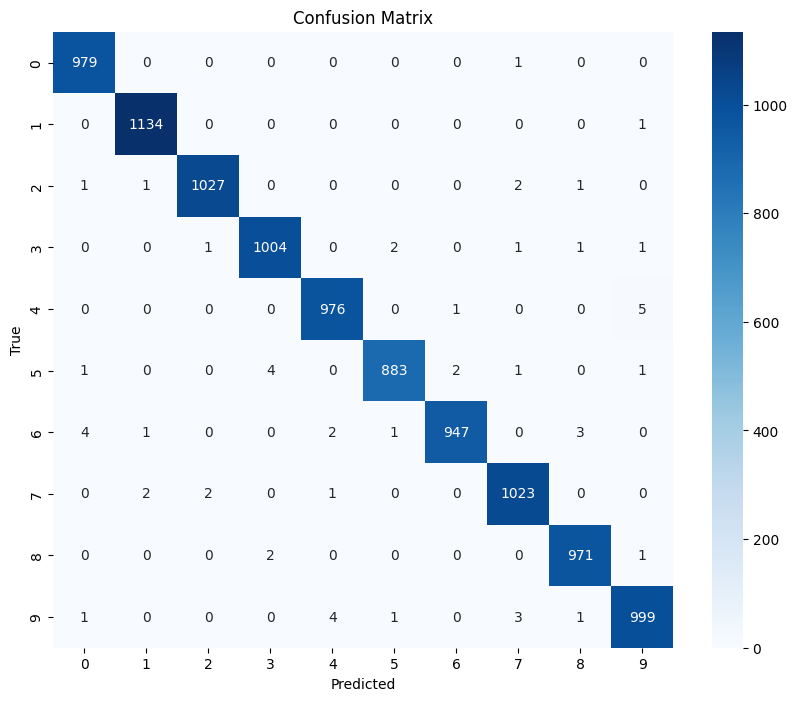

In [121]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Model 2 (CNN_2)

In [90]:
from keras.models import Sequential, Model
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

## Model 2 Compile

In [91]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Model 2 Train

In [92]:
 model.fit(X_train, train_labels,
          epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 7s 7ms/step - loss: 0.6511 - accuracy: 0.7877 - val_loss: 0.1392 - val_accuracy: 0.9601
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2335 - accuracy: 0.9317 - val_loss: 0.0917 - val_accuracy: 0.9728
Epoch 3/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1633 - accuracy: 0.9531 - val_loss: 0.0774 - val_accuracy: 0.9770
Epoch 4/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1310 - accuracy: 0.9619 - val_loss: 0.0573 - val_accuracy: 0.9837
Epoch 5/20
750/750 [==============================] - 5s 6ms/step - loss: 0.1076 - accuracy: 0.9703 - val_loss: 0.0520 - val_accuracy: 0.9846
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0887 - accuracy: 0.9750 - val_loss: 0.0454 - val_accuracy: 0.9864
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0756 - accuracy: 0.9781 - val_loss: 0.0477 - val_accuracy: 0.9857
Epoch 

## Model 2 Evaluation

In [94]:
loss_2, accuracy_2 = model.evaluate(X_test, y_test)
loss_2, accuracy_2

313/313 [==============================] - 1s 4ms/step - loss: 0.0309 - accuracy: 0.9926


(0.03085637465119362, 0.9926000237464905)

In [97]:
y_pred_model_2 = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 1s 3ms/step


## Model 2 Confusion Matrix

In [100]:
cm = confusion_matrix(y_test, y_pred_model_2)

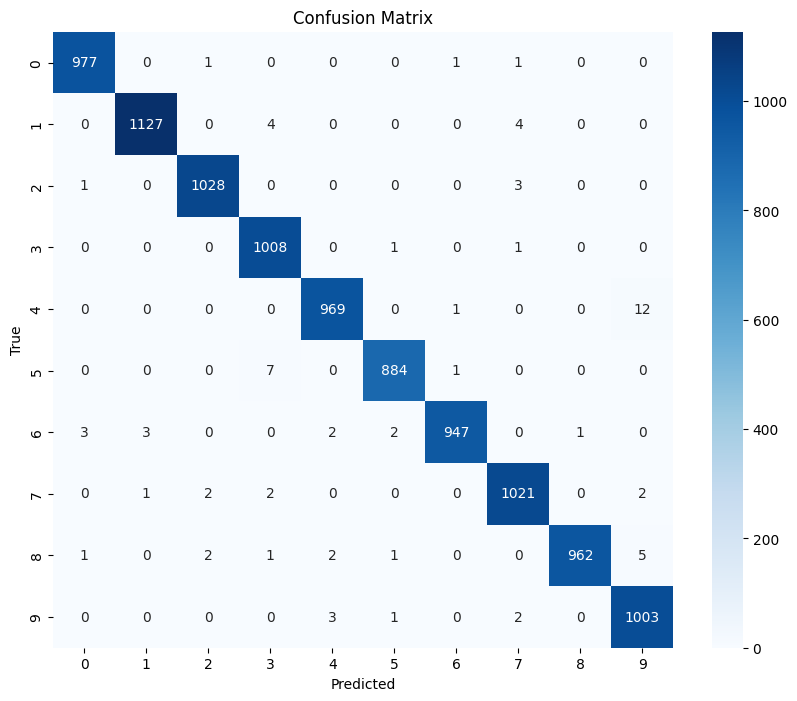

In [101]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Model 3 (CNN_3) AlexNet

In [41]:
alexNet_model = tf.keras.Sequential()

# 1st Convolutional Layer
alexNet_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
alexNet_model.add(tf.keras.layers.BatchNormalization())
alexNet_model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# 2nd Convolutional Layer
alexNet_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
alexNet_model.add(tf.keras.layers.BatchNormalization())
alexNet_model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# 3rd Convolutional Layer
alexNet_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
alexNet_model.add(tf.keras.layers.BatchNormalization())

# 4th Convolutional Layer
alexNet_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
alexNet_model.add(tf.keras.layers.BatchNormalization())

# 5th Convolutional Layer
alexNet_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
alexNet_model.add(tf.keras.layers.BatchNormalization())
alexNet_model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Flattening Layer
alexNet_model.add(tf.keras.layers.Flatten())

# 1st Fully Connected Layer
alexNet_model.add(tf.keras.layers.Dense(1024, activation='relu'))
alexNet_model.add(tf.keras.layers.BatchNormalization())
alexNet_model.add(tf.keras.layers.Dropout(0.5))

# 2nd Fully Connected Layer
alexNet_model.add(tf.keras.layers.Dense(512, activation='relu'))
alexNet_model.add(tf.keras.layers.BatchNormalization())
alexNet_model.add(tf.keras.layers.Dropout(0.5))

# Output Layer
alexNet_model.add(tf.keras.layers.Dense(10, activation='softmax'))

## Model 3 Compile

In [42]:
alexNet_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

## Model 3 Train

In [43]:
alexNet_model.fit(X_train, train_labels, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 18s 8ms/step - loss: 0.1749 - accuracy: 0.9488 - val_loss: 0.0787 - val_accuracy: 0.9788
Epoch 2/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0748 - accuracy: 0.9784 - val_loss: 0.0583 - val_accuracy: 0.9846
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0609 - accuracy: 0.9824 - val_loss: 0.0403 - val_accuracy: 0.9886
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0517 - accuracy: 0.9847 - val_loss: 0.0315 - val_accuracy: 0.9917
Epoch 5/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0468 - accuracy: 0.9862 - val_loss: 0.0432 - val_accuracy: 0.9882
Epoch 6/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0386 - accuracy: 0.9889 - val_loss: 0.0493 - val_accuracy: 0.9859
Epoch 7/20
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.0552 - val_ac

## Model 3 Evaluation

In [44]:
loss_alex, accuracy_alex = alexNet_model.evaluate(X_test, y_test)
loss_alex, accuracy_alex

313/313 [==============================] - 2s 6ms/step - loss: 0.0402 - accuracy: 0.9921


(0.040179189294576645, 0.9921000003814697)

In [50]:
alexNet_model.save('Alexnet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model 3 Confusion Matrix

In [75]:
y_pred = np.argmax(alexNet_model.predict(X_test), axis=1)

313/313 [==============================] - 1s 2ms/step


In [76]:
cm = confusion_matrix(y_test, y_pred)

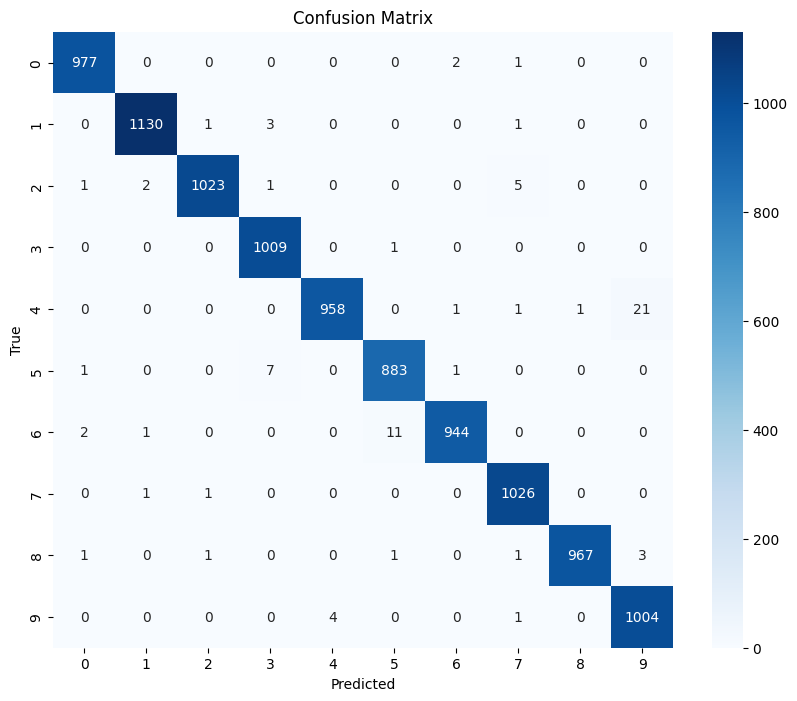

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Test On Real Handwritten Digits

## Loading image

In [70]:
image = cv2.imread('/content/english-digits.jpg', cv2.IMREAD_GRAYSCALE)

## Image Preprocessing and prediction each Digit

1/1 [==============================] - 0s 28ms/step


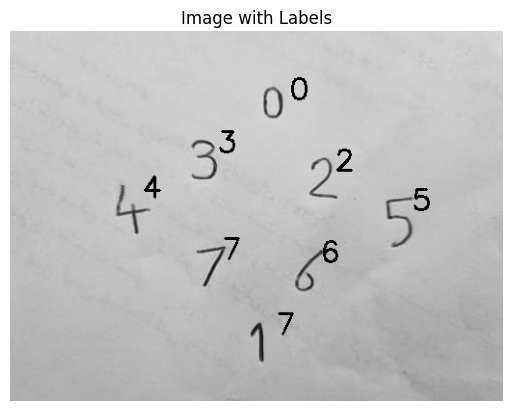

In [73]:
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
binary_image = 255 - binary_image
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

def draw_label(img, label, x, y, font_scale=1, font_thickness=2):
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size, _ = cv2.getTextSize(str(label), font, font_scale, font_thickness)
    text_x, text_y = x + int((text_size[0] + 30) / 2), y + text_size[1] - 10  # Adjust position
    cv2.putText(img, str(label), (text_x, text_y), font, font_scale, (0, 0, 255), font_thickness)

for label in range(1, num_labels):
    x, y, w, h = stats[label][:4]

    if w > 8 and h > 8:

        resized_image = cv2.resize(binary_image[y-10:y+h+10, x-10:x+w+10], (28, 28))
        normalized_image = resized_image / 255.0
        reshaped_image = np.expand_dims(normalized_image, axis=0)

        prediction = alexNet_model.predict(reshaped_image)
        predicted_class = np.argmax(prediction)

        draw_label(image, predicted_class, x, y)

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.title('Image with Labels')
plt.axis('off')
plt.show()